# LOAN PAYMENTS

'pip3' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

### for extending the width of the cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# DARK Monokai Theme for jupyter notebook
###################################################################################################
# from jupyterthemes import get_themes
# from jupyterthemes.stylefx import set_nb_theme
# set_nb_theme('monokai')

# ####################################################################################################

### LOAN Calculation EXAMPLE

Monthly Payments for a loan of 300,000 amount for a 360 period. i,e 30years


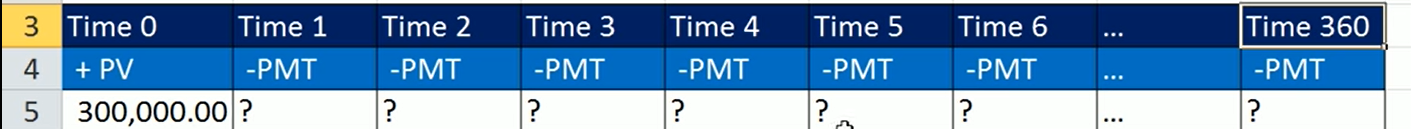

#### payment of loan per term

$$PMT = P \cdot \frac{ \left (r \cdot\ \left( 1+r\right)^n\right)}{\left( 1+r\right)^n -1}$$

In [73]:
class LoanPayments:
    """
    THIS CLASS IS AVAILABLE  WITH IMPLEMENTATIONS OF LOAN REPAYMENT SCHEDULE/ MONTHLY EMI CALC
    OF A FIXED RATE LOAN
    , ETC.
    """
    
    @staticmethod
    def get_PMT_of_a_Loan(loan_amount=300000, annual_rate=0.1, number_of_payments_in_a_year=12, term_in_years = 120):
        """
        This func gets back the PMT for a given loan with Fixed loan rate
        
        INTERESTING FACT : PMT can never be less than monthly payment of loan.
        
        """
        rate = annual_rate/number_of_payments_in_a_year
        n = term_in_years*number_of_payments_in_a_year
        pmt  = loan_amount*(rate*(1+rate)**n)/ (((1+rate)**n) -1)
        return(pmt)
        
    
    @staticmethod
    def get_loan_payment_dataframe(loan_amount=300_000, annual_rate=0.1, number_of_payments_in_a_year=12, term_in_years = 30):
        """ 
        this fucntion gets a dataframe returns a repayment scedule of a loan
        #slow func
        """
        pmt = LoanPayments().get_PMT_of_a_Loan(loan_amount, annual_rate=0.1, number_of_payments_in_a_year=12, term_in_years = 30)  
        n = (term_in_years*number_of_payments_in_a_year)
        r = annual_rate/number_of_payments_in_a_year

        payment_df = pd.DataFrame(columns=['Time','Interest_paid','Principal_paid','PMT','Principal_remaining'],index= np.arange(0,n+1))
        
        #introduce time =0 with all the loan amount
        payment_df['Time'].iloc[0]= 0
        payment_df['Interest_paid'].iloc[0]= 0
        payment_df['Principal_paid'].iloc[0] =  0
        payment_df['PMT']=pmt
        payment_df['Principal_remaining'].iloc[0]= loan_amount
        
        time = 1
        loan_pending = loan_amount
        while loan_pending >=0:
            interest = loan_pending*r
            payment_df['Time'].iloc[time]= time
            payment_df['Interest_paid'].iloc[time]= interest
            principal_pay= pmt - interest
            payment_df['Principal_paid'].iloc[time]= principal_pay
            loan_pending = loan_pending -principal_pay
            payment_df['Principal_remaining'].iloc[time]= loan_pending
            time+=1
            
        return(payment_df)
    
    
    

In [74]:
payment_df = LoanPayments.get_loan_payment_dataframe()

In [77]:
payment_df

,Time,Interest_paid,Principal_paid,PMT,Principal_remaining
0,0,0,0,2632.71471,300000
1,1,2500.0,132.71471,2632.71471,299867.28529
2,2,2498.894044,133.820666,2632.71471,299733.464624
3,3,2497.778872,134.935838,2632.71471,299598.528785
4,4,2496.654407,136.060304,2632.71471,299462.468481
...,...,...,...,...,...
356,356,107.006484,2525.708226,2632.71471,10315.069874
357,357,85.958916,2546.755795,2632.71471,7768.31408
358,358,64.735951,2567.97876,2632.71471,5200.33532
359,359,43.336128,2589.378583,2632.71471,2610.956737
